In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms
import sklearn.datasets
import sklearn.preprocessing
import sklearn.model_selection

In [2]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X_train = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y_train = numeros['target']

In [3]:
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = X_train.reshape((n_imagenes,8,8))
X_train = np.expand_dims(X_train, 1)

In [4]:
inputs = torch.autograd.Variable(torch.Tensor(X_train).float())
targets = torch.autograd.Variable(torch.Tensor(Y_train).long())

In [5]:
mean = inputs.mean(dim=0)
std = inputs.std(dim=0)
std[std==0]=1.0

for i in range(len(inputs)):
    inputs[i] = (inputs[i]-mean)/std
np.shape(inputs)

torch.Size([1797, 1, 8, 8])

In [6]:
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 12, kernel_size=4),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(12,7,kernel_size=2),
            torch.nn.ReLU(True))
        self.decoder = torch.nn.Sequential(             
            torch.nn.ConvTranspose2d(7,12,kernel_size=2),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(12,1,kernel_size=4),
            torch.nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [7]:
num_epochs = 500
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)

In [8]:
losss = []
for epoch in range(num_epochs):
    output = model(inputs)
    loss = distance(output, inputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))
    losss.append(loss.item())

epoch [1/500], loss:0.9540
epoch [2/500], loss:0.9414
epoch [3/500], loss:0.9261
epoch [4/500], loss:0.9003
epoch [5/500], loss:0.8779
epoch [6/500], loss:0.8556
epoch [7/500], loss:0.8330
epoch [8/500], loss:0.8188
epoch [9/500], loss:0.8088
epoch [10/500], loss:0.7995
epoch [11/500], loss:0.7901
epoch [12/500], loss:0.7817
epoch [13/500], loss:0.7744
epoch [14/500], loss:0.7677
epoch [15/500], loss:0.7600
epoch [16/500], loss:0.7534
epoch [17/500], loss:0.7495
epoch [18/500], loss:0.7447
epoch [19/500], loss:0.7373
epoch [20/500], loss:0.7298
epoch [21/500], loss:0.7227
epoch [22/500], loss:0.7148
epoch [23/500], loss:0.7066
epoch [24/500], loss:0.6988
epoch [25/500], loss:0.6912
epoch [26/500], loss:0.6825
epoch [27/500], loss:0.6737
epoch [28/500], loss:0.6653
epoch [29/500], loss:0.6562
epoch [30/500], loss:0.6470
epoch [31/500], loss:0.6376
epoch [32/500], loss:0.6283
epoch [33/500], loss:0.6190
epoch [34/500], loss:0.6098
epoch [35/500], loss:0.6016
epoch [36/500], loss:0.5942
e

Text(0, 0.5, 'Loss')

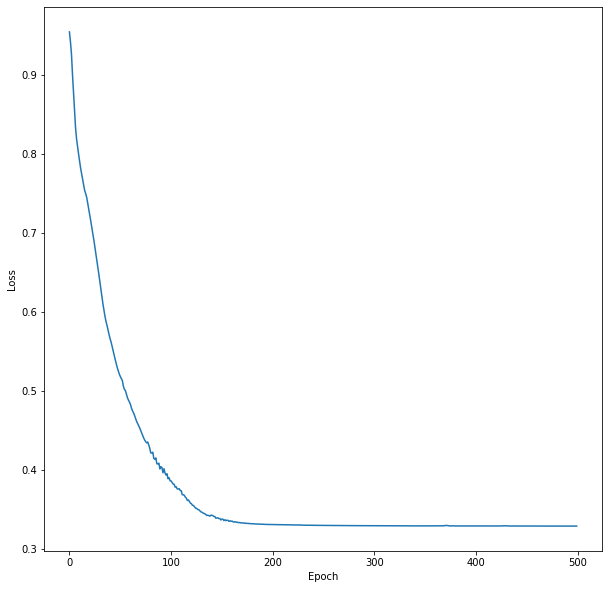

In [9]:
plt.figure(figsize = (10,10))
plt.plot(range(500),losss)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [10]:
x_transform = model(inputs)
latent_space = model.encoder(inputs)

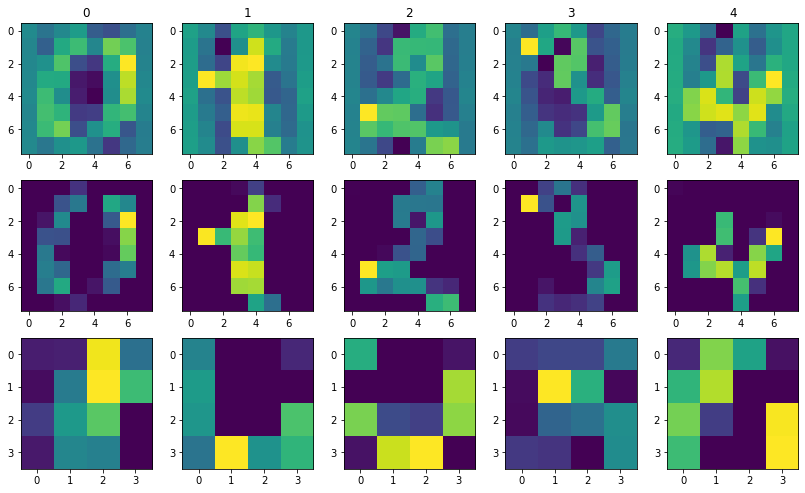

In [28]:
plt.figure(figsize=(14,14))
offset = 0
for i in range(5):
    plt.subplot(5,5,i+1) 
    plt.imshow(X_train[Y_train == i][0].reshape((8,8)))
    plt.title('{}'.format(i) )
    
    j=0 
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(x_transform[i+offset][0].detach().numpy())
    
    j=1 
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(latent_space[i+offset][2].detach().numpy())